#Sentiment lexicon based classifier:

In [ ]:
#import some libraries
import numpy as np
import re
import os
import random
import matplotlib.pyplot as plt

In [ ]:
# Here I have included a set of stop words so that I can remove those words from my vocabulary later on
stop_words = {"0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't", "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz"}

In [ ]:
#Reading files to extract the list of postive and negative words
filename_pos =  "" # use your filename of positive-words
filename_neg = "" # use your filename of negative-words
file1 = open(filename_pos, 'r')
file2 = open(filename_neg, encoding = "ISO-8859-1")
Lines1 = file1.readlines()
Lines2 = file2.readlines()

words_pos = [] # The list containing postive sentiment words
words_neg = [] # The list containing negative sentiment words

# in my case it is that the words are in the text file line by line starting from index 30 which might be different for you
for i in range(30, len(Lines1)):
  words_pos.append(Lines1[i].strip().lower())

for i in range(31, len(Lines2)):
  words_neg.append(Lines2[i].strip().lower())

print(words_pos)
print(words_neg)

# you can also use all of this code as a function that takes in parameters the file names of the positive and the negative words and returns a list of positive and negative word lists.

['a+', 'abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation', 'accolade', 'accolades', 'accommodative', 'accomodative', 'accomplish', 'accomplished', 'accomplishment', 'accomplishments', 'accurate', 'accurately', 'achievable', 'achievement', 'achievements', 'achievible', 'acumen', 'adaptable', 'adaptive', 'adequate', 'adjustable', 'admirable', 'admirably', 'admiration', 'admire', 'admirer', 'admiring', 'admiringly', 'adorable', 'adore', 'adored', 'adorer', 'adoring', 'adoringly', 'adroit', 'adroitly', 'adulate', 'adulation', 'adulatory', 'advanced', 'advantage', 'advantageous', 'advantageously', 'advantages', 'adventuresome', 'adventurous', 'advocate', 'advocated', 'advocates', 'affability', 'affable', 'affably', 'affectation', 'affection', 'affectionate', 'affinity', 'affirm', 'affirmation', 'affirmative', 'affluence', 'affluent', 'afford', 'affordable', 'affordably', 'afordable', 'agile', 'agilely', 'agility', 'agreeable', 'ag

In [ ]:
# This function tokenizes a given sentence into a list of words
def tokenize(sentence):
  tokens = re.findall(r'\b\w+\b', sentence)
  return tokens

# This function computes the score of the document in terms of how many postive and negative sentiment words are present
def score(review, pos, neg):
  count_pos = 0
  count_neg = 0
  neither = 0

  for word in review:
    if word.lower() in pos:
      count_pos += 1
    elif word.lower() in neg:
      count_neg += 1
    else:
      neither += 1
  
  return count_pos, count_neg, neither

# This function classifies a given document as negative or positive based on the number of positive and negative sentiment words present
def classify(txt, pos, neg):
  words = []
  
  if len(txt) > 0:
    for sentence in txt:
      words.extend(tokenize(sentence))
  
    words = list(map(str.lower,words)) 
  
    score_pos = score(words, pos, neg)[0]
    score_neg = score(words, pos, neg)[1]

  if score_pos > score_neg:
    return 1
  else:
    return -1


In [ ]:
doc = ['The movie was great and exceeded my expectaions. The characters were beautifully portrayed and I think that the director is extremely talented. I predict that this movie is going to be a massive success.']
# check to classify your own document
#print(classify(doc, words_pos, words_neg))

-1


In [ ]:
# This function computes the accuracy of our sentiment-lexicon classifier
def compute_accuracy(data_test, dict_sign, pos, neg):
  n = len(data_test)
  link_list = []
  count_right = 0
  tp = 0
  tn = 0
  fp = 0
  fn = 0
  
  for link in data_test:
    if dict_sign[link] == 1:
      filename_pos_classified = "" # the path file to the folder containing the positively labeled files
      arr_pos = np.loadtxt(filename_pos_classified + link, dtype = "str", delimiter = "\n")
      #print("link:", link)
      val_pos = classify(arr_pos, words_pos, words_neg)
      if val_pos == 1:
        count_right += 1
        tp += 1
        link_list.append((link, 'True_lab:positive', 'correct'))
      else:
        fn += 1
        link_list.append((link, 'True_lab: positive', 'wrong'))


    if dict_sign[link] == -1:
      filename_neg_classified = "" # the path file to the folder containing the negatively labeled files
      arr_neg = np.loadtxt(filename_neg_classified + link, dtype = "str", delimiter = "\n")
      #print("link:", link)
      val_neg = classify(arr_neg, words_pos, words_neg)
      if val_neg == -1:
        count_right += 1
        tn += 1
        link_list.append((link, 'True_lab: negative', 'correct'))
      else:
        fp += 1
        link_list.append((link, 'True_lab: negative', 'wrong'))

  precision = tp/(tp + fp)
  recall = tp/(tp + fn)

  return count_right/n, precision, recall, link_list

In [ ]:
# Get the list of all files and directories
path_neg = "" # use the file path to the folder of the negatively labeled files
path_pos = "" # use the file path to the folder of the positively labeled files
list_neg = os.listdir(path_neg)
list_pos = os.listdir(path_pos)

dict_neg = {}
dict_pos = {}

for val in list_neg:
  dict_neg[val] = -1

for v in list_pos:
  dict_pos[v] = 1

list_pos.extend(list_neg)
list_all = list_pos.copy()
dict_pos.update(dict_neg)
dict_all = dict_pos.copy()
random_400 = random.sample(list_all, 400) # Taking 400 random samples as our test set

acc = compute_accuracy(random_400, dict_all, words_pos, words_neg)[0]
prec = compute_accuracy(random_400, dict_all, words_pos, words_neg)[1]
recall = compute_accuracy(random_400, dict_all, words_pos, words_neg)[2]
F1_score = 2*(prec*recall)/(prec + recall)
links_pred = compute_accuracy(random_400, dict_all, words_pos, words_neg)[3]

print("Accuracy: ", acc)
print("Precision: ", prec)
print("Recall: ", recall)
print("F1_score: ", F1_score)
print("Links and their prediction:", links_pred)

Accuracy:  0.68
Precision:  0.7102272727272727
Recall:  0.6188118811881188
F1_score:  0.6613756613756614
Links and their prediction: [('cv461_19600.txt', 'True_lab: positive', 'wrong'), ('cv310_14568.txt', 'True_lab: negative', 'wrong'), ('cv030_22893.txt', 'True_lab: negative', 'correct'), ('cv397_28890.txt', 'True_lab: negative', 'correct'), ('cv374_26455.txt', 'True_lab: negative', 'correct'), ('cv711_12687.txt', 'True_lab: negative', 'wrong'), ('cv384_17140.txt', 'True_lab:positive', 'correct'), ('cv036_16831.txt', 'True_lab: positive', 'wrong'), ('cv284_20530.txt', 'True_lab: negative', 'correct'), ('cv154_9328.txt', 'True_lab:positive', 'correct'), ('cv812_17924.txt', 'True_lab:positive', 'correct'), ('cv346_18168.txt', 'True_lab: positive', 'wrong'), ('cv694_4526.txt', 'True_lab: negative', 'correct'), ('cv680_10160.txt', 'True_lab:positive', 'correct'), ('cv207_29284.txt', 'True_lab: positive', 'wrong'), ('cv385_29621.txt', 'True_lab: negative', 'correct'), ('cv309_22571.txt', 

### Logistic Regression Classifier:

In [ ]:
path_neg = "" # use the file path to the folder of the negatively labeled files
path_pos = "" # use the file path to the folder of the positively labeled files
list_neg = os.listdir(path_neg)
list_pos = os.listdir(path_pos)

paths = []
total_words = 0

for val in list_neg:
  paths.append((val, 0))
for value in list_pos:
  paths.append((value, 1))

random.seed(7)
random.shuffle(paths) # I am randomly shuffling the paths so that I can train on the randomly shuffles top 1600 samples and use the rest 400 as test.

df = []
df1 = []

for path in paths:
  if path[1] == 1:
    filename_pos_classified_lr = "" # the path file to the folder containing the positively labeled files
    arr = np.loadtxt(filename_pos_classified_lr + path[0] ,dtype = "str", delimiter = "\n")

    words1 = []
    sequence1 = []

    if arr.size == 1:
      arr = np.array([arr])

    for sentence in arr:
      words1.extend(tokenize(sentence))
      sequence1.append(str.lower(sentence))
    words1 = list(map(str.lower,words1)) 
    total_words += len(words1)
    
    df.append([set(words1) - stop_words, 1])
    df1.append([" ".join(sequence1), 1])

  if path[1] == 0:
    filename_neg_classified_lr = "" # the path file to the folder containing the negatively labeled files
    arr1 = np.loadtxt(filename_neg_classified_lr + path[0] ,dtype = "str", delimiter = "\n")
    words2 = []
    sequence2 = []
    if arr1.size == 1:
      arr1 = np.array([arr1])

    for sentence in arr1:
      words2.extend(tokenize(sentence))
      sequence2.append(str.lower(sentence))
      
    words2 = list(map(str.lower,words2))
    total_words += len(words2)

In [ ]:
a = [] # a contains all the documents
lab = []

for i in range(len(df1)):
  a.append(df1[i][0])
  lab.append(df1[i][1])

lab = np.array(lab)
print(len(a))

2000


In [ ]:
# This function takes in the list of documents and returns a sparse matrix which is similar to the CountVectorizer function.
def fit_transform(documents, vocab, v_idx, spec_doc = []):
        for doc in documents:
            for word in doc.split(" "):
                if word not in vocab:
                    vocab[word] = v_idx
                    v_idx += 1
        matrix = []
        row_matrix = []
        if len(spec_doc) > 0:
          for d in spec_doc:
            row_vector = [0] * len(vocab)
            for w in d.split(" "):
              row_vector[vocab[word]] += 1
            row_matrix.append(row_vector)
        for doc in documents:
            doc_vector = [0] * len(vocab)
            for word in doc.split(" "):
                doc_vector[vocab[word]] += 1
            matrix.append(doc_vector)
        return matrix, row_matrix

In [ ]:
voc = {} # This will contain the vocabulary
idx = 0
x_train = fit_transform(a, voc, idx)[0][:1600] #1600 samples for train
x_test = fit_transform(a, voc, idx)[0][1600:] #400 samples for test
x_train = np.squeeze(np.asarray(x_train))
x_test = np.squeeze(np.asarray(x_test))
y_train = lab[:1600]
y_test = lab[1600:]

In [ ]:
vocab = {}
sorted_vocab = sorted(s)

for word in sorted_vocab:
  vocab[word] = 0

labels = []
X = []

for doc in df:
  for w in doc[0]:
    vocab[w] += 1
  rows = np.array(list(vocab.values()))
  X.append(rows)
  labels.append(doc[1])

X = np.array(X)
y = np.array(labels)

In [ ]:
def normalize(x): # Code to normalize x
  m,n = x.shape
  x = (x - x.mean(axis = 0))/x.std(axis = 0)
  return x

In [ ]:
def sigmoid(z): # Sigmoid function
  return 1.0/(1 + np.exp(-z))

def gradient(X, y, y_hat): # gradient function based on calculating the gradient for the logistic regression classifier.
  m = X.shape[0]

  dw = 1/m * np.dot(X.T, (y_hat - y))
  db = 1/m * np.sum(y_hat - y)

  return dw, db

def loss(y, y_hat): # logistic loss function
  return -np.mean(y*(np.log(y_hat)) + (1-y)*np.log(1-y_hat))

def binary_logistic_train(X, y, alpha, batch_size, epochs): # Train function
  m = X.shape[0]
  n = X.shape[1]
  
  theta = np.zeros((n,1))
  y = y.reshape(m,1)
  b = 0
  np.seterr(invalid='ignore')
  #X = normalize(X)
  loss_arr = []
  epoch_arr = []

  for iter in range(epochs):
    for i in range((m-1)//batch_size + 1):
      X_sub = X[i*batch_size: (i+1)*batch_size]
      y_sub = y[i*batch_size: (i+1)*batch_size]

      y_hat = sigmoid(np.dot(X_sub,theta) + b)
      dw, db = gradient(X_sub, y_sub, y_hat)

      theta -= alpha*dw
      b -= alpha*db
      
    l = loss(y, sigmoid(np.dot(X, theta) + b))
    print("loss:", l)
    print("iter", iter)
    loss_arr.append(l)
    epoch_arr.append(iter)

  return theta, b, loss_arr, epoch_arr

In [ ]:
def predict(X_t, wt, bias_t): # Predict the labels
  preds = sigmoid(np.dot(X_t,wt) + bias_t)
  predict_class = []

  for val in preds:
    if val <= 0.5:
      predict_class.append(0)
    else:
      predict_class.append(1)

  return predict_class

def accuracy(y_true, y_predict): # calculates the accuracy, precision and recall
  m = len(y_true)
  count = 0
  tp = 0
  tn = 0
  fp = 0
  fn = 0
  
  for i in range(len(y_true)):
    if y_true[i] == y_predict[i]:
      if y_true[i] == 1:
        tp += 1
      else:
        tn += 1
      count += 1
    else:
      if y_true[i] == 0:
        fn += 1
      else:
        fp += 1
    
  
  precision = tp/(tp + fp)
  recall = tp/(tp + fn)
      
  return count/m, precision, recall

def F1_score(p, r): # Calculate the F1 score
  return 2*p*r/(p + r)

In [ ]:
# I am using a learning rate alpha = 0.001, batch size = 100 and 1500 epochs
weights, bias, losses, epoch_arr = binary_logistic_train(x_train, y_train, 0.001, 100, 1500)

loss: 0.9391893114429473
iter 0
loss: 0.8936508517823506
iter 1
loss: 0.8538236736848195
iter 2
loss: 0.8203106065383982
iter 3
loss: 0.7922213236643249
iter 4
loss: 0.7684878118856385
iter 5
loss: 0.7482409259726575
iter 6
loss: 0.7308219741915323
iter 7
loss: 0.7157116660636922
iter 8
loss: 0.7024780915536243
iter 9
loss: 0.6907579675274179
iter 10
loss: 0.6802528496578446
iter 11
loss: 0.6707250035434242
iter 12
loss: 0.6619892534603389
iter 13
loss: 0.6539028638940624
iter 14
loss: 0.6463558601923708
iter 15
loss: 0.6392629677187541
iter 16
loss: 0.6325573793127774
iter 17
loss: 0.6261861156861717
iter 18
loss: 0.6201066281703198
iter 19
loss: 0.614284320252998
iter 20
loss: 0.6086907321612127
iter 21
loss: 0.6033021998122631
iter 22
loss: 0.5980988533436309
iter 23
loss: 0.5930638602004504
iter 24
loss: 0.5881828459685505
iter 25
loss: 0.5834434458020153
iter 26
loss: 0.5788349529213178
iter 27
loss: 0.5743480401173562
iter 28
loss: 0.5699745368009635
iter 29
loss: 0.5657072487870

Text(0, 0.5, 'Log loss')

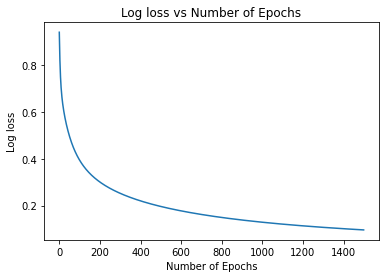

In [ ]:
x_axis = epoch_arr
y_axis = losses

plt.plot(x_axis, y_axis)
plt.title("Log loss vs Number of Epochs")
plt.xlabel("Number of Epochs")
plt.ylabel("Log loss")

In [ ]:
acc, prec, rec = accuracy(y_test, predict(x_test, weights, bias))
F1 = round(F1_score(prec,rec), 2)
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1_score:", F1)

Accuracy: 0.855
Precision: 0.8526315789473684
Recall: 0.84375
F1_score: 0.85


In [ ]:
# Extra code
def convert(file_paths):
  
  df = []

  p = file_paths

  for path in p:
    if path[1] == 1:
      arr = np.loadtxt("/content/drive/MyDrive/NLP class assignment files/review_polarity/txt_sentoken/pos/" + path[0] ,dtype = "str", delimiter = "\n")

      words1 = []

      if arr.size == 1:
        arr = np.array([arr])

      for sentence in arr:
        words1.extend(tokenize(sentence))
      words1 = list(map(str.lower,words1)) 
      df.append([words1, 1, path[0]])

    if path[1] == 0:
      arr1 = np.loadtxt("/content/drive/MyDrive/NLP class assignment files/review_polarity/txt_sentoken/neg/" + path[0] ,dtype = "str", delimiter = "\n")
      words2 = []
      if arr1.size == 1:
        arr1 = np.array([arr1])

      for sentence in arr1:
        words2.extend(tokenize(sentence))
      words2 = list(map(str.lower,words2)) 
      df.append([words2, 0, path[0]])

  s = set(df[0][0])

  for i in range(1, len(df)):
    s.update(set(df[i][0]))

  vocab = {}
  sorted_vocab = sorted(s)

  for word in sorted_vocab:
    vocab[word] = 0

  labels = []
  X_te = []
  file_p = []
  result = []

  for doc in df:
    for w in doc[0]:
      vocab[w] += 1
    rows = np.array(list(vocab.values()))
    result.append((rows, doc[1], doc[2]))
    
  return result